In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych<H1>

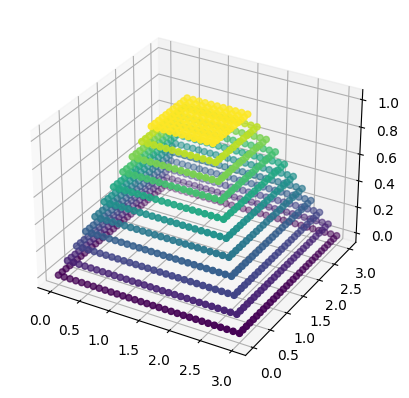

In [2]:
x = np.arange(0, 3.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY = np.column_stack((dataX,dataY))

data_labels = []
for x, y in zip(dataX, dataY):
    x-=1.5
    y-=1.5
    data_labels.append( abs(x) if (y<x and y>-x) or (y>x and y<-x)  else abs(y) ) 
data_labels=np.array(data_labels)
#data_labels[data_labels>1.5] = 1.5
data_labels=abs(data_labels-1.5)
data_labels[data_labels>1] = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataX, dataY, data_labels, c=data_labels)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

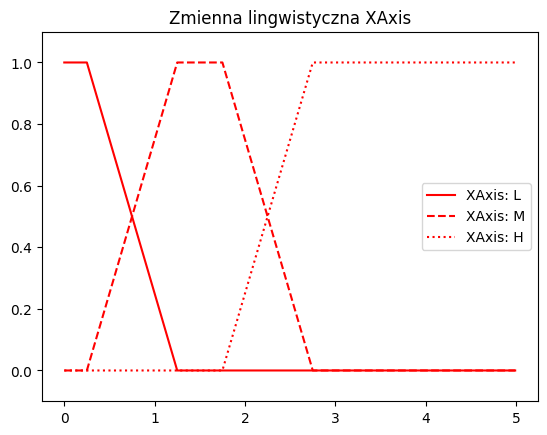

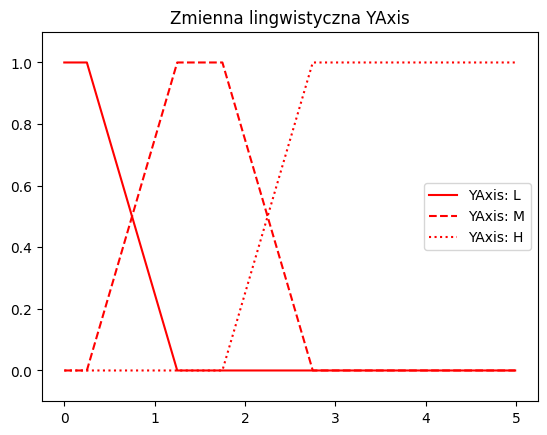

In [3]:
varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "XAxis", ["L","M","H"])
varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "YAxis", ["L","M","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.figure()
varY.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.show()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   18.33849292114052
Liczba ew:  292370
Liczba it:  100
FIS premises [[1.49977539 1.00061786 0.09943676 0.99981136]
 [1.4999757  1.00021867 0.9997899  0.99974516]]
TIME elapsed:  126.27253413200378


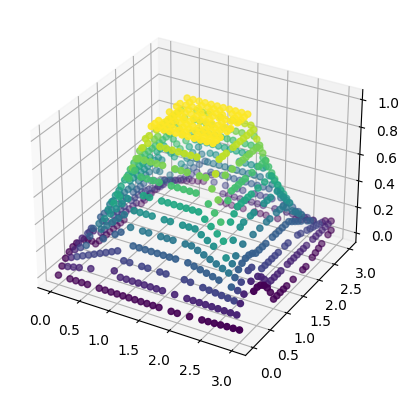

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

<H1>Zadanie</H1>

Zaimplementuj wszystkie operatory rozmyte pokazane w pliku "Najczęściej stosowane t-normy". Następnie użyj ich do uczenia powyższego systemu ANFIS, która z nich jest najlepsza, jak myślisz dlaczego?

In [5]:
%matplotlib auto

Using matplotlib backend: <object object at 0x000001B923BA2590>


In [6]:
%matplotlib inline

In [53]:
def zadeh_t(inputs, other):
    return np.min(inputs, axis=0)

def zadeh_s(inputs, other):
    return np.max(inputs, axis=0)

def einstein_t(inputs, other):
    return inputs[0] * inputs[1] / (2 - (inputs[0] + inputs[1] - inputs[0] * inputs[1]))

def einstein_s(inputs, other):
    return (inputs[0] + inputs[1]) / (1 + inputs[0] * inputs[1])

Optymalizacja zakończona!
z blędem:   24.655162574650046
Liczba ew:  280521
Liczba it:  100
FIS premises [[3.5947431  1.252393   2.14591093 3.08982705]
 [1.54471405 1.17251063 0.82583844 0.79784674]]
TIME elapsed:  117.93666362762451


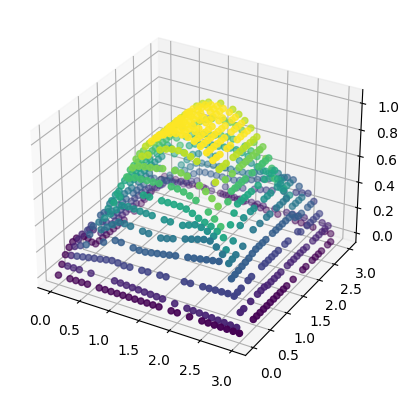

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=zadeh_t)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   103.75030514818644
Liczba ew:  145314
Liczba it:  100
FIS premises [[0.00502318 1.93675575 0.12213817 1.81283495]
 [3.34605663 1.14691869 1.79500086 3.9219105 ]]
TIME elapsed:  60.59367513656616


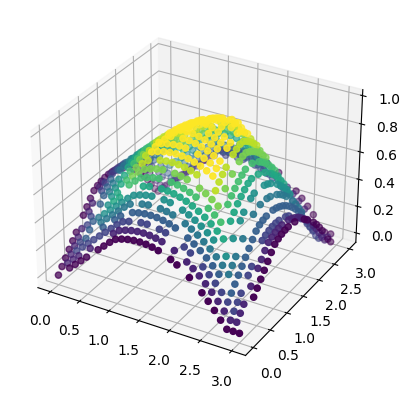

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=zadeh_s)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   29.13486465587018
Liczba ew:  272938
Liczba it:  100
FIS premises [[1.54546591 1.09093184 0.96591056 0.83730621]
 [3.39260017 0.85492075 2.16170864 3.25094238]]
TIME elapsed:  116.55372095108032


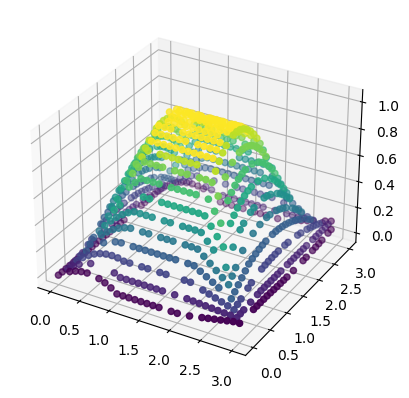

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=algebraic_t)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

In [ ]:
def algebraic_t(inputs, other):
    return inputs[0] * inputs[1]

def probabilistic_s(inputs, other):
    return inputs[0] + inputs[1] - (inputs[0] * inputs[1])

Optymalizacja zakończona!
z blędem:   110.22757981284796
Liczba ew:  199293
Liczba it:  100
FIS premises [[0.02860237 2.44358224 3.98233598 1.50882956]
 [0.04434287 2.81146411 3.45910686 1.24992499]]
TIME elapsed:  84.44673299789429


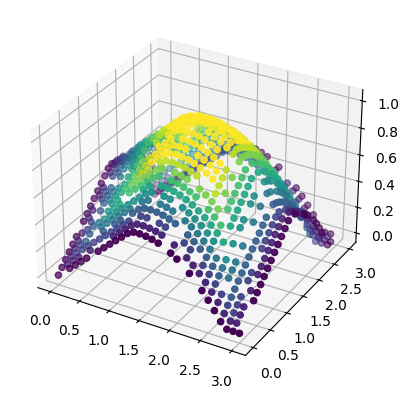

In [45]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=probabilistic_s)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

In [ ]:
def lukasiewicz_t(inputs, other):
    return np.max(inputs[0] + inputs[1] - np.ones(inputs.shape, dtype = float), 0)

def lukasiewicz_s(inputs, other):
    return np.where(inputs[0] + inputs[1] < 1, inputs[0] + inputs[1], 1)

Optymalizacja zakończona!
z blędem:   90.93087433379398
Liczba ew:  169911
Liczba it:  100
FIS premises [[3.07923115 0.15811587 2.99998662 3.53482424]
 [3.96931281 0.52675571 3.20636138 1.94560294]]
TIME elapsed:  77.39664721488953


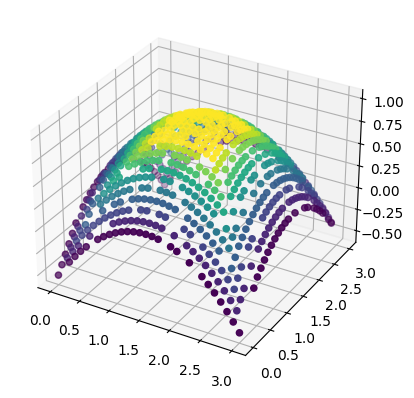

In [32]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=lukasiewicz_t)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   113.23388748597213
Liczba ew:  188603
Liczba it:  100
FIS premises [[0.38635982 1.92642766 3.73512096 1.44204631]
 [0.64644385 2.2033559  3.4123848  0.92452986]]
TIME elapsed:  82.13049221038818


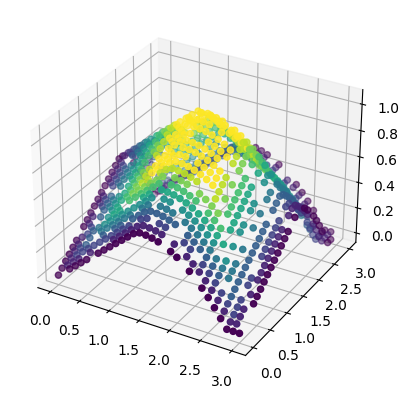

In [54]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=lukasiewicz_s)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

In [55]:
def fodor_t(inputs, other):
    return np.where(inputs[0] + inputs[1] > 1, np.min(inputs, axis=0), 0)

def fodor_s(inputs, other):
    return np.where(inputs[0] + inputs[1] < 1, np.max(inputs, axis=0), 1)

C:\Users\cubix\Desktop\MSI\normy\ANFIS.py:80: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   51.41326389725046
Liczba ew:  186714
Liczba it:  100
FIS premises [[1.4020634  1.20813875 0.1360308  0.84402482]
 [0.3238295  1.00645095 2.91320394 2.04468285]]
TIME elapsed:  83.11070322990417


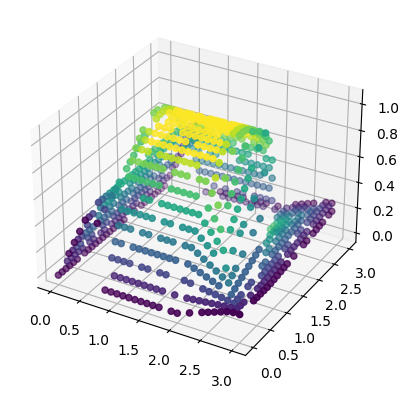

In [56]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=fodor_t)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   110.22757674407683
Liczba ew:  173618
Liczba it:  100
FIS premises [[0.41025405 1.68026393 3.95998668 1.50884702]
 [0.65105782 1.59797971 3.87814685 1.24995105]]
TIME elapsed:  77.6139726638794


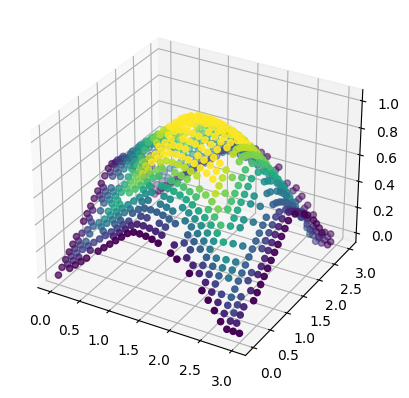

In [57]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=fodor_s)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

In [62]:
def drastic_t(inputs, other):
    boolean = np.logical_or(inputs[0] == 1, inputs[1] == 1)
    return np.where(boolean, np.min(inputs, axis=0), 0)

def drastic_s(inputs, other):
    boolean = np.logical_or(inputs[0] == 0, inputs[1] == 0)
    return np.where(boolean, np.max(inputs, axis=0), 1)

C:\Users\cubix\Desktop\MSI\normy\ANFIS.py:80: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


Optymalizacja zakończona!
z blędem:   88.71056622560523
Liczba ew:  170216
Liczba it:  100
FIS premises [[1.82139012e-08 1.31302595e+00 3.53692851e+00 6.83507674e-13]
 [3.02716215e+00 1.63690993e-01 2.20775403e+00 8.70433055e-01]]
TIME elapsed:  80.18879556655884


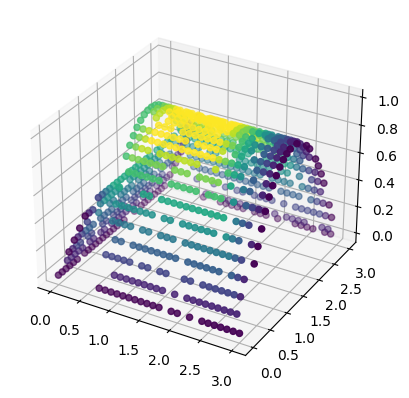

In [63]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=drastic_t)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   114.04894048600862
Liczba ew:  174952
Liczba it:  100
FIS premises [[3.41706801 1.23412201 1.4131504  2.39027155]
 [3.68188834 2.09409092 0.69437217 3.40154222]]
TIME elapsed:  83.0284960269928


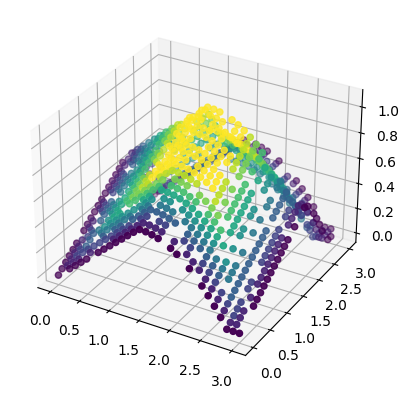

In [65]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=drastic_s)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

In [66]:
def einstein_t(inputs, other):
    return ((inputs[0] * inputs[1])/(2 - (inputs[0] + inputs[1] - inputs[0] * inputs[1])))

def einstein_s(inputs, other):
    return (inputs[0] + inputs[1])/(1 + inputs[0] * inputs[1])

Optymalizacja zakończona!
z blędem:   32.00109346487241
Liczba ew:  240642
Liczba it:  100
FIS premises [[3.83191787 1.71385496 2.17499119 4.        ]
 [1.54397652 1.05410069 0.98045322 0.92336005]]
TIME elapsed:  109.57157039642334


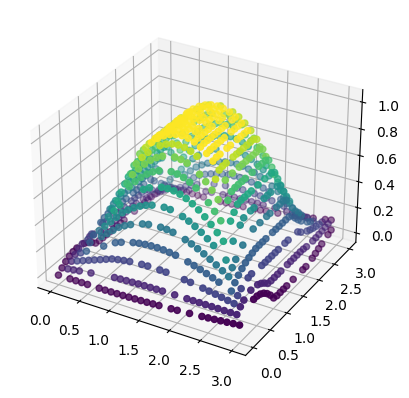

In [67]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=einstein_t)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   111.19540528947977
Liczba ew:  173234
Liczba it:  100
FIS premises [[0.16644579 2.19701991 4.         1.51252621]
 [3.54407324 1.69234525 1.17807276 3.6688809 ]]
TIME elapsed:  74.11049175262451


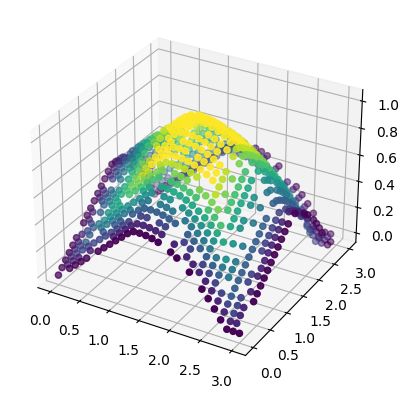

In [68]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=einstein_s)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

In [86]:
def exp_t(inputs, other):
    return np.exp(np.min(inputs, axis=0) - 1) / (np.exp(1) - 1)
def exp_s(inputs, other):
    return np.exp(np.max(inputs, axis=0) - 1) / (np.exp(1) - 1)

Optymalizacja zakończona!
z blędem:   88.95461262682679
Liczba ew:  178416
Liczba it:  100
FIS premises [[1.4068873  1.44661001 0.45817589 0.56335059]
 [1.42368896 1.46377924 0.46723588 0.52890439]]
TIME elapsed:  86.24838066101074


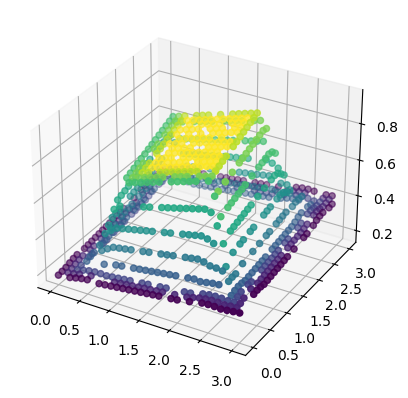

In [84]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=exp_t)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   156.21568754235787
Liczba ew:  197969
Liczba it:  100
FIS premises [[0.05833246 0.30973443 3.54398063 2.28679797]
 [1.36327276 1.63051849 0.39138019 0.51301538]]
TIME elapsed:  96.37233638763428


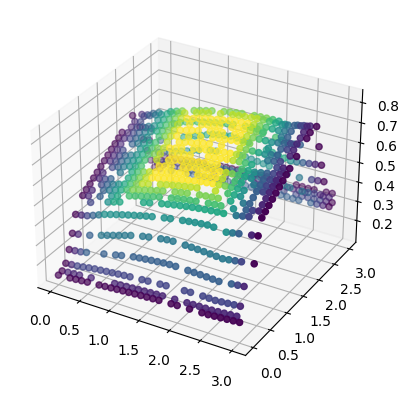

In [87]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, operator_function=exp_s)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)